# McDonald Valley Problem

* Layer 0: upper aquifer (lake)
* Layer 1: upper aquifer
* Layer 2: confining bed
* Layer 3: lower aquifer A
* Layer 4: lower aquifer B

In [62]:
import os
import matplotlib.pyplot as plt
import numpy as np
import flopy

In [63]:
datapth = './data'
nlay, nrow, ncol = 5, 200, 125

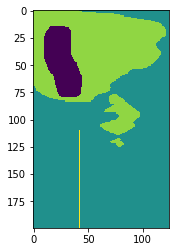

In [64]:
# read ibound layer 0
ibound0 = np.empty((nrow * ncol), dtype=np.int)
fname = os.path.join(datapth, 'ibound1.dat')
f = open(fname)
ibound0 = flopy.utils.read1d(f, ibound0).reshape((nrow, ncol))
f.close()
plt.imshow(ibound0)

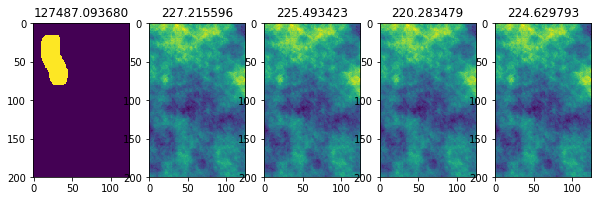

In [65]:
# read hk layer 0
hk = []
fig, axes = plt.subplots(ncols=5, figsize=(10, 10))
fig.figsize = (10, 10)
for k in range(nlay):
    hk_ = np.empty((nrow * ncol), dtype=np.float)
    fname = os.path.join(datapth, 'hk{}.dat'.format(k + 1))
    f = open(fname)
    hk_ = flopy.utils.read1d(f, hk_).reshape((nrow, ncol))
    f.close()
    ax = axes[k]
    cb = ax.imshow(hk_)
    hk.append(hk_)
    ax.set_title('{:2f}'.format(hk_.mean()))
    #plt.colorbar(cb)

Text(0.5, 1.0, 'Aquifer K (min: 22.61; max: 482.15)')

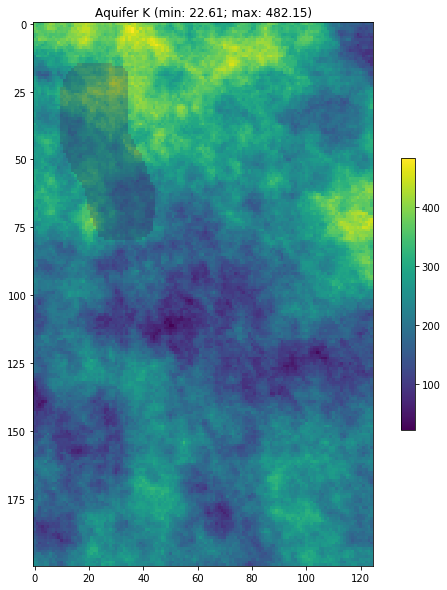

In [87]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
c = ax.imshow(hk[1])
plt.colorbar(c, shrink=0.5)
plt.imshow(np.ma.masked_where(ibound0 != -2, ibound0), alpha=0.2)
ax.set_title('Aquifer K (min: {}; max: {})'.format(hk[1].min(), hk[1].max()))

In [34]:
delr = delc = 100.
laycon = [1, 0, 0, 0, 0]
bot0 = -5

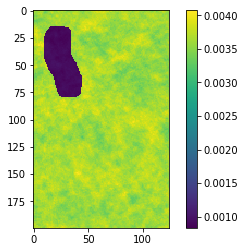

In [35]:
# read rech layer 0 (the array is multipled by 0.00365)
rech = np.empty((nrow * ncol), dtype=np.float)
fname = os.path.join(datapth, 'rech.dat')
f = open(fname)
rech = flopy.utils.read1d(f, rech).reshape((nrow, ncol))
rech = rech * 0.00365
f.close()
plt.imshow(rech)
plt.colorbar()

Text(0.5, 1.0, '32691.780821917808')

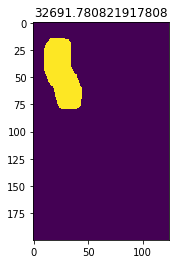

In [36]:
# lake budget
precip = 36 # inches per year
evap = 27 # inches per year
lake_area = 1.625e7 # feet squared

# rech_lake = np.where(ibound0<0, rech, 0)
rech_lake = np.where(ibound0<0, (precip - evap) / 12. / 365., 0)
plt.imshow(rech_lake)
plt.title('{}'.format(rech_lake.sum() * 100 * 100))

Text(0.5, 1.0, '851640.0423499999')

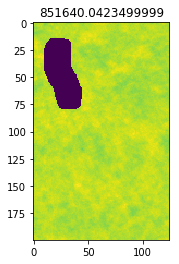

In [37]:
rech_aquifer = np.where(ibound0>0, rech, 0)
plt.imshow(rech_aquifer)
plt.title('{}'.format(rech_aquifer.sum() * 100 * 100))

Text(0.5, 1.0, '1.56')

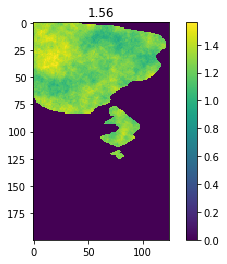

In [38]:
# confining unit thickness
thick2 = np.empty((nrow * ncol), dtype=np.float)
fname = os.path.join(datapth, 'thick3.dat')
f = open(fname)
thick2 = flopy.utils.read1d(f, thick2).reshape((nrow, ncol))
f.close()
plt.imshow(thick2)
plt.colorbar()
plt.title('{}'.format(thick2.max()))

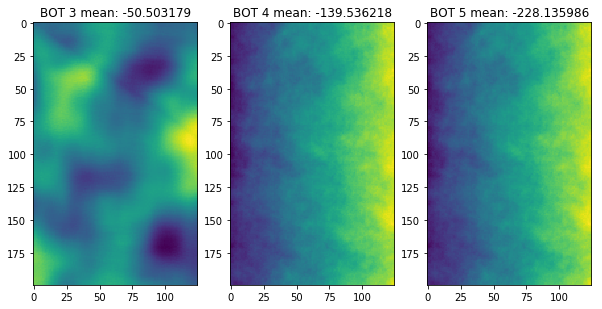

In [89]:
# read bot 2-4
bot = []
fig, axes = plt.subplots(ncols=3, figsize=(10, 10))
fig.figsize = (10, 10)
for k in range(2, nlay):
    bot_ = np.empty((nrow * ncol), dtype=np.float)
    fname = os.path.join(datapth, 'bot{}.dat'.format(k + 1))
    f = open(fname)
    bot_ = flopy.utils.read1d(f, bot_).reshape((nrow, ncol))
    f.close()
    ax = axes[k - 2]
    cb = ax.imshow(bot_)
    bot.append(bot_)
    ax.set_title('BOT {} mean: {:2f}'.format(k + 1, bot_.mean()))

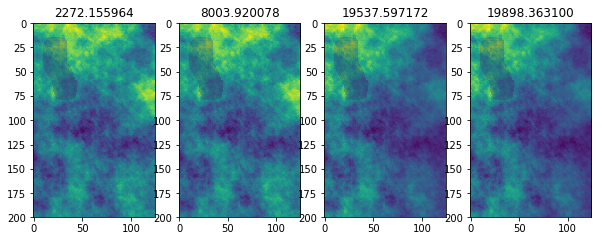

In [91]:
# read tran 1-4
tran = []
fig, axes = plt.subplots(ncols=4, figsize=(10, 10))
fig.figsize = (10, 10)
for k in range(1, nlay):
    tran_ = np.empty((nrow * ncol), dtype=np.float)
    fname = os.path.join(datapth, 'tran{}.dat'.format(k + 1))
    f = open(fname)
    tran_ = flopy.utils.read1d(f, tran_).reshape((nrow, ncol))
    f.close()
    ax = axes[k - 1]
    cb = ax.imshow(tran_)
    tran.append(tran_)
    ax.set_title('{:2f}'.format(tran_.mean()))
    ax.imshow(np.ma.masked_where(ibound0 != -2, ibound0), alpha=0.2)

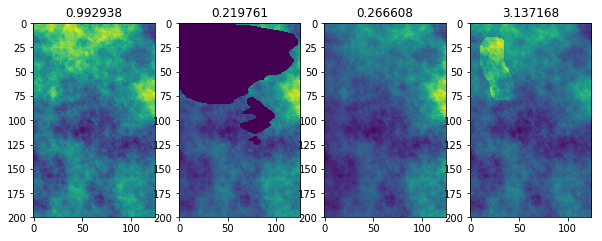

In [41]:
# read vcont 1-4
vcont = []
fig, axes = plt.subplots(ncols=4, figsize=(10, 10))
fig.figsize = (10, 10)
for k in range(nlay - 1):
    vcont_ = np.empty((nrow * ncol), dtype=np.float)
    fname = os.path.join(datapth, 'vcont{}.dat'.format(k + 1))
    f = open(fname)
    vcont_ = flopy.utils.read1d(f, vcont_).reshape((nrow, ncol))
    f.close()
    ax = axes[k - 1]
    cb = ax.imshow(vcont_)
    vcont.append(vcont_)
    ax.set_title('{:2f}'.format(vcont_.mean()))

Text(0.5, 1.0, 'Clay K (min: 0.00254; max: 0.00422)')

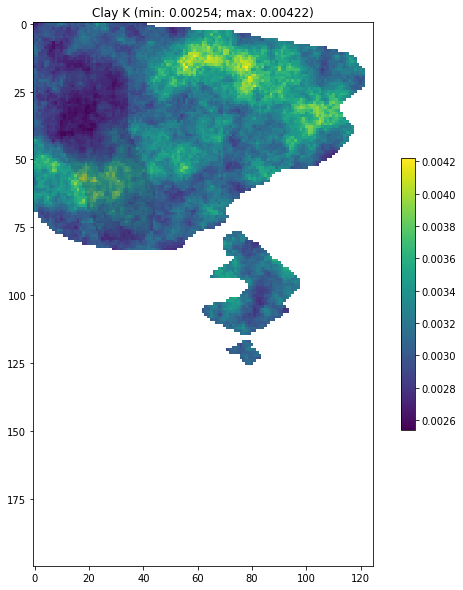

In [92]:
kvclay = vcont[2]
kvclay = np.ma.masked_where(ibound0 == 1, kvclay)
kvclay = np.ma.masked_where(ibound0 == 4, kvclay)
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
c = ax.imshow(kvclay)
plt.colorbar(c, shrink=0.5)
plt.imshow(np.ma.masked_where(ibound0 != -2, ibound0), alpha=0.2)
ax.set_title('Clay K (min: {}; max: {})'.format(kvclay.min(), kvclay.max()))

(0, 20000)

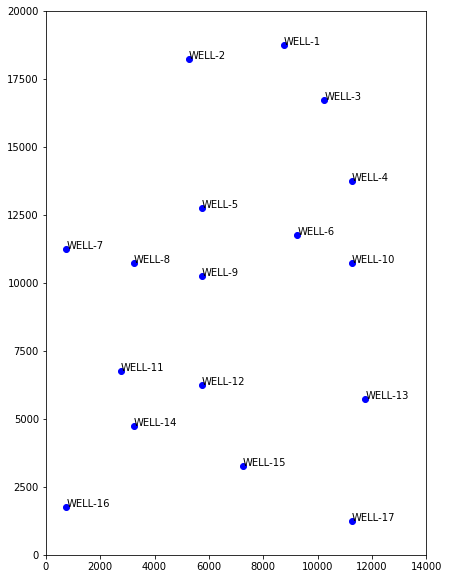

In [42]:
well_info = [
    [1, 3, 18, 12.05],
    [2, 4, 11, 11.63],
    [3, 7, 21, 12.15],
    [4, 13, 23, 11.44],
    [5, 15, 12, 10.86],
    [6, 17, 19, 10.80],
    [7, 18, 2, 9.16],
    [8, 19, 7, 8.82],
    [9, 20, 12, 8.86],
    [10, 19, 23, 10.65],
    [11, 27, 6, 4.26],
    [12, 28, 12, 4.19],
    [13, 29, 24, 7.57],
    [14, 31, 7, 2.70],
    [15, 34, 15, 4.59],
    [16, 37, 2, 2.76],
    [17, 38, 23, 6.23]]
well_info = [('WELL-{}'.format(id), 
              col * 500. - 250., 
              40 * 500 - row * 500 + 250,
              stage) for id, row, col, stage in well_info]
dt = np.dtype([('name', 'S15'), ('x', float), ('y', float), ('stage', float)])
well_info = np.array(well_info, dtype=dt)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
ax.plot(well_info['x'], well_info['y'], 'bo')
for name, x, y, stage in well_info:
    ax.text(x, y, name.decode())
ax.set_xlim(0, 28 * 500)
ax.set_ylim(0, 40 * 500)

In [184]:
ws = './mf2005'
name = 'mv'
nlay, nrow, ncol = 5, 200, 125
m = flopy.modflow.Modflow(modelname=name, model_ws=ws, exe_name='mf2005')
dis = flopy.modflow.ModflowDis(m, nlay=nlay, nrow=nrow, ncol=ncol, delr=100, delc=100,
                               top=0., botm=[-5, -6, -7, -8, -9], nper=4)
#bas = flopy.modflow.ModflowBas(m, strt=11., ibound=[ibound0, 1, 1, 1, 1])
bas = flopy.modflow.ModflowBas(m, strt=11., ibound=[1, 1, 1, 1, 1])
bcf = flopy.modflow.ModflowBcf(m, laycon=[1, 0, 0, 0, 0], 
                               hy=[hk[0], -999., -999., -999., -999.],
                               tran=[-999., tran[0], tran[1], tran[2], tran[3]],
                               vcont=vcont)

nriv = 200 - 110
rivstage = np.linspace(1.79, 0.01, nriv)
rbot = np.linspace(-0.210, -1.99, nriv)
rivspd = []
for iriv in range(nriv):
    rivspd.append([0, iriv + 110, 42, rivstage[iriv], 80000, rbot[iriv]])
riv = flopy.modflow.ModflowRiv(m, stress_period_data=rivspd, ipakcb=-1)

rch = flopy.modflow.ModflowRch(m, rech=rech_aquifer + rech_lake)

welspd = {1:[[5-1, 173-1, 78-1, -268000.0], [4-1, 28-1, 73-1, -67000.0]],
          2:[[5-1, 163-1, 28-1, -268000.0], [4-1, 28-1, 73-1, -67000.0]],
          3:[[4-1, 28-1, 73-1, -67000.0]]}
wel = flopy.modflow.ModflowWel(m, stress_period_data=welspd)

drnspd = {3: [[1 - 1, 113-1, 98 - 1, 2., 1000000.]]}
drn = flopy.modflow.ModflowDrn(m, stress_period_data=drnspd)

pcg = flopy.modflow.ModflowPcg(m, iter1=100, hclose=0.0001, rclose=1.0)
ocspd = {}
for kper in range(dis.nper):
    ocspd[(kper, 0)] = ['print head', 'save head', 'print budget', 'save budget']
oc = flopy.modflow.ModflowOc(m, stress_period_data=ocspd)
oc.reset_budgetunit(budgetunit=50, fname=name + '.bud')
m.write_input()
m.run_model()

FloPy is using the following  executable to run the model: /Users/langevin/langevin/bin/mac/mf2005

                                  MODFLOW-2005     
    U.S. GEOLOGICAL SURVEY MODULAR FINITE-DIFFERENCE GROUND-WATER FLOW MODEL
                             Version 1.12.00 2/3/2017                        

 Using NAME file: mv.nam 
 Run start date and time (yyyy/mm/dd hh:mm:ss): 2019/05/23 16:13:35

 Solving:  Stress period:     1    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     2    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     3    Time step:     1    Ground-Water Flow Eqn.
 Solving:  Stress period:     4    Time step:     1    Ground-Water Flow Eqn.
 Run end date and time (yyyy/mm/dd hh:mm:ss): 2019/05/23 16:13:46
 Elapsed run time: 11.088 Seconds

  Normal termination of simulation


(True, [])

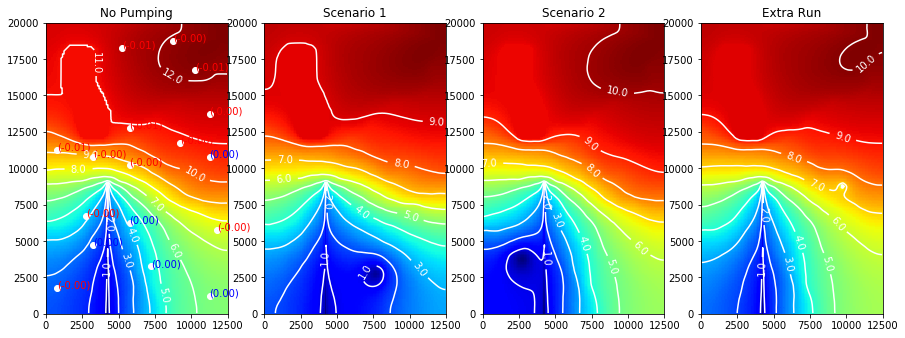

In [201]:
hdobj = flopy.utils.HeadFile(os.path.join(ws, name + '.hds'))
fig = plt.figure(figsize=(15, 15))
headall = hdobj.get_alldata()

titles = ['No Pumping', 'Scenario 1', 'Scenario 2', 'Extra Run']
for kper in range(dis.nper):
    #head = hdobj.get_data(totim=hdobj.times[kper])
    head = headall[kper]
    ax = fig.add_subplot(2, dis.nper, kper + 1, aspect='equal')
    pmv = flopy.plot.PlotMapView(m)
    qm = pmv.plot_array(head, cmap='jet')
    #plt.colorbar(qm, shrink=0.5)
    cs = pmv.contour_array(head, levels=np.arange(20), colors='white')
    ax.clabel(cs, inline=1, fontsize=10, fmt='%1.1f')
    ax.set_title(titles[kper])

    if kper == 0:
        ax.plot(well_info['x'], well_info['y'], 'wo')
        for id, (welname, x, y, stage) in enumerate(well_info):
            row, column = m.modelgrid.intersect(x, y)
            r = head[0, row, column] - stage
            color = 'red'
            if r > 0:
                color = 'blue'
            ax.text(x, y, '({:.2f})'.format(r), color=color)

In [186]:
label = ['no pumping', 'scenario A', 'scenario B', 'Extra Run']
for kper in range(dis.nper):
    hlake = headall[kper][0, ibound0 == -2]
    print(label[kper] + ' lake stage:', hlake.max())

no pumping lake stage: 11.000048
scenario A lake stage: 8.950214
scenario B lake stage: 9.334531
Extra Run lake stage: 9.23731


In [187]:
fname = os.path.join(ws, name + '.bud')
budobj = flopy.utils.CellBudgetFile(fname)
riv0 = budobj.get_data(kstpkper=(0, 0), text='RIVER LEAKAGE')[0]
riv1 = budobj.get_data(kstpkper=(0, 1), text='RIVER LEAKAGE')[0]
riv2 = budobj.get_data(kstpkper=(0, 2), text='RIVER LEAKAGE')[0]
drn3 = budobj.get_data(kstpkper=(0, 3), text='DRAINS')[0]

Text(0, 0.5, 'Discharge to river (ft^3/day)')

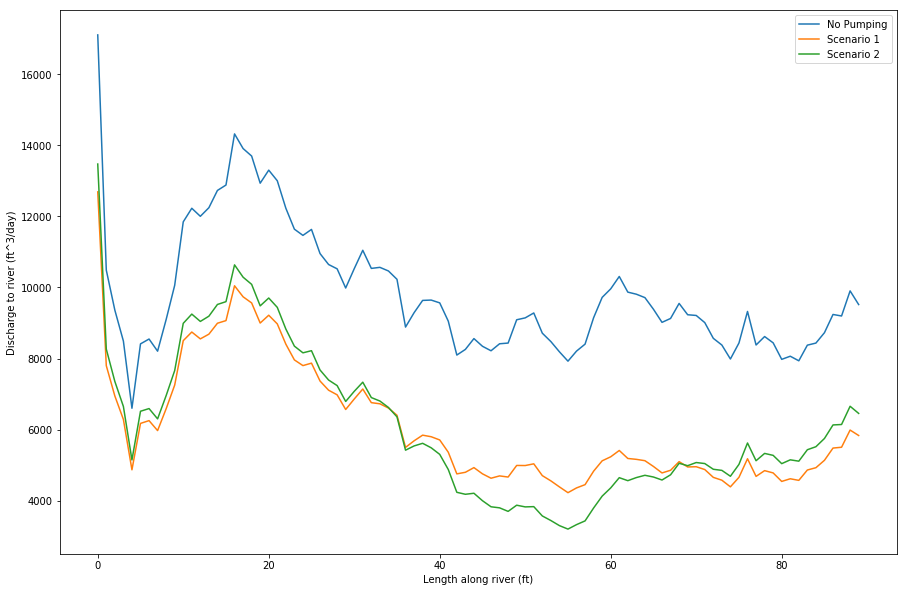

In [188]:
fig = plt.figure(figsize=(15, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(abs(riv0['q']), label='No Pumping')
ax.plot(abs(riv1['q']), label='Scenario 1')
ax.plot(abs(riv2['q']), label='Scenario 2')
ax.legend()
ax.set_xlabel('Length along river (ft)')
ax.set_ylabel('Discharge to river (ft^3/day)')

In [189]:
headsc0 = headall[0]
headsc1 = headall[1]
headsc2 = headall[2]
headsc3 = headall[3]
dd1 = headsc0[:, 0:16*5, :] - headsc1[:, 0:16*5, :]
print('Max drawdown in northern part (Scen 1): ', dd1.max())
dd2 = headsc0[:, 0:16*5, :] - headsc2[:, 0:16*5, :]
print('Max drawdown in northern part (Scen 2): ', dd2.max())

Max drawdown in northern part (Scen 1):  4.015389
Max drawdown in northern part (Scen 2):  3.5305476


Text(0.5, 1.0, 'Scenario 1 Drawdown (min: 0.022; max: 4.6) Layer 1')

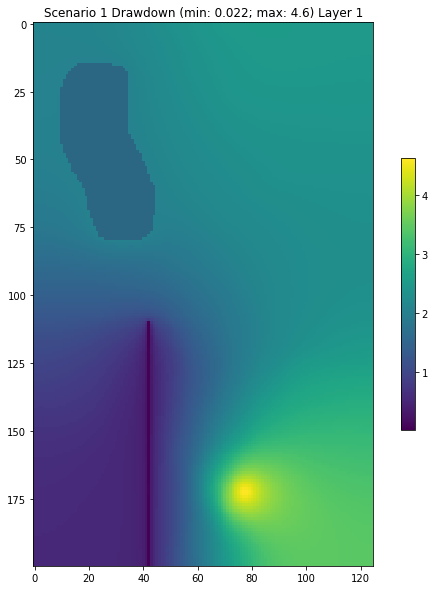

In [190]:
ilay = 0
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
dd = headsc0 - headsc1
dd = dd[0]
c = ax.imshow(dd)
plt.colorbar(c, shrink=0.5)
plt.imshow(np.ma.masked_where(ibound0 != -2, ibound0), alpha=0.2)
ttl = 'Scenario 1 Drawdown (min: {:.2}; max: {:.2})'.format(dd.min(), dd.max())
ttl += ' Layer {}'.format(ilay + 1)
ax.set_title(ttl)

Text(0.5, 1.0, 'Scenario 2 Drawdown (min: 0.018; max: 2.6) Layer 1')

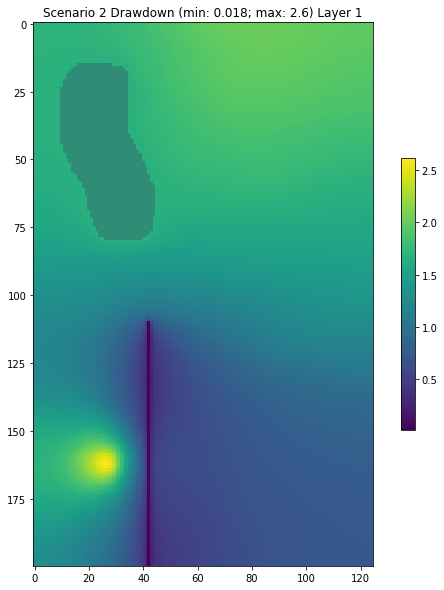

In [191]:
ilay = 0
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
dd = headsc0 - headsc2
dd = dd[0]
c = ax.imshow(dd)
plt.colorbar(c, shrink=0.5)
plt.imshow(np.ma.masked_where(ibound0 != -2, ibound0), alpha=0.2)
ttl = 'Scenario 2 Drawdown (min: {:.2}; max: {:.2})'.format(dd.min(), dd.max())
ttl += ' Layer {}'.format(ilay + 1)
ax.set_title(ttl)

Text(0.5, 1.0, 'Extra Run Head (min: 0.12; max: 10.1) Layer 1')

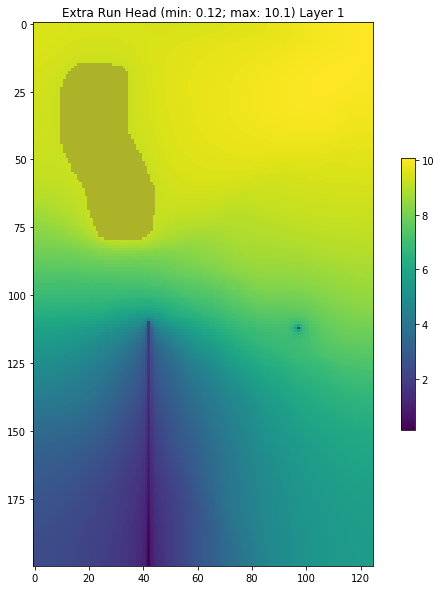

In [196]:
ilay = 0
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, aspect='equal')
hd = headsc3[ilay]
c = ax.imshow(hd)
plt.colorbar(c, shrink=0.5)
plt.imshow(np.ma.masked_where(ibound0 != -2, ibound0), alpha=0.2)
ttl = 'Extra Run Head (min: {:.3}; max: {:.3})'.format(hd.min(), hd.max())
ttl += ' Layer {}'.format(ilay + 1)
ax.set_title(ttl)

In [197]:
print('Extra Run Drain flow: ', drn3[0]['q'])
print('Drain head: ', headsc3[1 - 1, 113-1, 98 - 1])

Extra Run Drain flow:  -55944.625
Drain head:  2.0559447
